In [2]:
## Import the spacy library for NLP processes
import spacy

#Loading English pipeline language model and assign it to a vairable
nlp = spacy.load("en_core_web_sm")

#Creating a text to be tokenized and assignt it to the created variable
doc = nlp("Sommaren är bäst i Sverige när bäst är först")

#First, the raw text is split on whitespace characters, similar to text.split(' ').
#Then, the tokenizer processes the text from left to right. //source: https://spacy.io/usage/linguistic-features#tokenization
for token in doc:
    print(token.text)


Sommaren
är
bäst
i
Sverige
när
bäst
är
först


-improvements for above-
Since the text is short, and code is simple there is not much improvements in our opinion.
What could be done is that we could create our own pipline, takes more time but should be more efficient?


In [1]:
## Import the spacy library for NLP processes
import spacy 

#import panda library
import pandas as pd
import re

#Being able to print all values, not truncating the results
pd.set_option('display.max_colwidth', None)


#Loading English pipeline language model and assign it to a vairable
nlp = spacy.load("en_core_web_sm")

#Reading the file located in my PC local files.
df = pd.read_csv('IMDB Dataset.csv')

#only extracting the column "review" from document.
df =df.review

#only extracting first 500 rows
df =df.head(500)

#Turn into string.
text_combined = str(df)

#Removing all special characters
text_combined = re.sub('\W+',' ', text_combined )
#Removing break tag
text_combined = text_combined.replace('br',' ')

doc = nlp(text_combined)

#Print each token, giv it a part of speech (pos) and a tag
for token in doc:
    print(token.text," | ", token.pos_," | ", token.tag_)
    
    

0  |  NUM  |  CD
One  |  NUM  |  CD
of  |  ADP  |  IN
the  |  DET  |  DT
other  |  ADJ  |  JJ
reviewers  |  NOUN  |  NNS
has  |  AUX  |  VBZ
mentioned  |  VERB  |  VBN
that  |  SCONJ  |  IN
after  |  ADP  |  IN
watching  |  VERB  |  VBG
just  |  ADV  |  RB
1  |  NUM  |  CD
Oz  |  NOUN  |  NN
episode  |  NOUN  |  NN
you  |  PRON  |  PRP
ll  |  AUX  |  MD
be  |  AUX  |  VB
hooked  |  VERB  |  VBN
They  |  PRON  |  PRP
are  |  AUX  |  VBP
right  |  ADJ  |  JJ
as  |  SCONJ  |  IN
this  |  PRON  |  DT
is  |  AUX  |  VBZ
exactly  |  ADV  |  RB
what  |  PRON  |  WP
happened  |  VERB  |  VBD
with  |  ADP  |  IN
me  |  PRON  |  PRP
      |  SPACE  |  _SP
The  |  DET  |  DT
first  |  ADJ  |  JJ
thing  |  NOUN  |  NN
that  |  PRON  |  WDT
struck  |  VERB  |  VBD
me  |  PRON  |  PRP
about  |  ADP  |  IN
Oz  |  PROPN  |  NNP
was  |  AUX  |  VBD
its  |  PRON  |  PRP$
   |  SPACE  |  _SP
utality  |  NOUN  |  NN
and  |  CCONJ  |  CC
unflinching  |  VERB  |  VBG
scenes  |  NOUN  |  NNS
of  |  ADP  |  I

-Improvements to above-

if necacery, could add more information that's in the spacy library, such as the following:
print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
 token.shape_, token.is_alpha, token.is_stop)



In [33]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import re
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


embed = hub.load("https://tfhub.dev/google/"
"universal-sentence-encoder-large/5")

#Reading the file located in my PC local files.
df = pd.read_csv('IMDB Dataset.csv')

#only extracting the column "review" from document.
df =df.review

#only extracting first 500 rows
df =df.head(20)

#Making it a string
text_combined = str(df)

#Removing all special characters
text_combined = re.sub('\W+',' ', text_combined )
#Removing break tag
text_combined = text_combined.replace('br',' ')

vecarray=[]
for i in df:
    text_combined = str(i)
    embedding = embed([text_combined])
    vecarray.append(embedding[0])

    
df=pd.DataFrame(vecarray)

scaler=StandardScaler()
scaler.fit(df.head(20))
scaled_data =scaler.transform(vecarray)

#Changing 512 dimensions to 2
pca =PCA(n_components=2)
pca.fit(scaled_data)

x_pca=pca.transform(scaled_data)




In [32]:
scaled_data.shape

(20, 512)

In [27]:
x_pca.shape


(20, 2)

In [26]:
scaled_data

array([[-1.61827706, -0.14737021, -1.22190579, ..., -1.42058628,
        -0.15072959,  0.32481728],
       [ 0.87082933,  0.98189616,  1.10526437, ..., -0.22688954,
        -0.21585523,  0.2347577 ],
       [-0.20803181,  1.03658944,  0.14567351, ..., -0.52245777,
         0.10347174,  0.3984682 ],
       ...,
       [-0.20004238,  2.13377572,  1.11593875, ...,  0.70997372,
        -0.48479167,  0.67969213],
       [-0.27825874,  1.01236521,  0.2378113 , ...,  0.49795443,
         1.20242185, -1.69677395],
       [ 0.25948919,  0.29217355, -0.41021357, ...,  0.30644677,
         0.31010818,  1.12420677]])

In [29]:
x_pca

array([[-12.33122033,  -5.93825929],
       [ -6.34818088,   0.37280085],
       [ -7.5521278 ,  -0.44724661],
       [  2.30008309,  -0.5306546 ],
       [ -8.00382703,  -6.42611304],
       [  6.34605337,  -7.19287834],
       [ -0.27812254,   8.894849  ],
       [  0.4002717 ,   2.22042491],
       [  1.36116754,   6.406125  ],
       [ 14.10702464, -11.50040304],
       [  3.15446087,  -7.65873412],
       [ -2.28904629,  -0.11564479],
       [-13.66818921,  -4.49105834],
       [  5.14684948,  16.51063558],
       [ 11.94823803,  -7.97910185],
       [  2.69405476,   0.7177412 ],
       [  2.14608433,   6.18534376],
       [ -9.20909709,   1.56258416],
       [  4.52419972,   3.78451579],
       [  5.55132364,   5.62507376]])

Text(0, 0.5, 'y-axie')

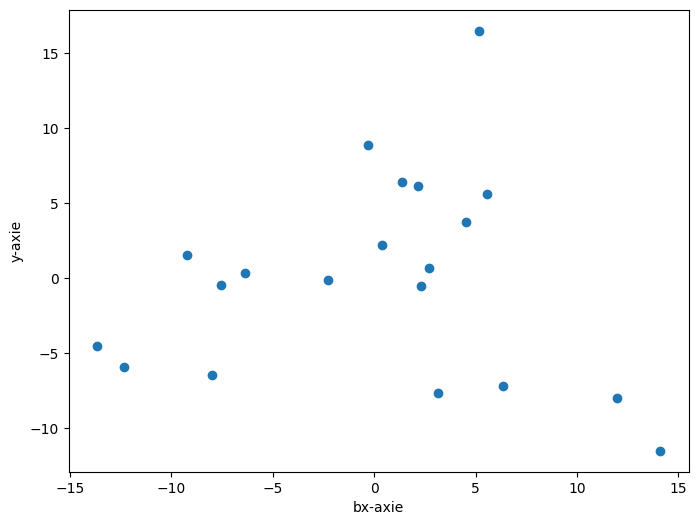

In [31]:
##Figuer
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('x-axie')
plt.ylabel('y-axie')